In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import warnings

warnings.filterwarnings('ignore')

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products (1).csv')
transactions_df = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

# Check for missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

# Basic information about the datasets
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

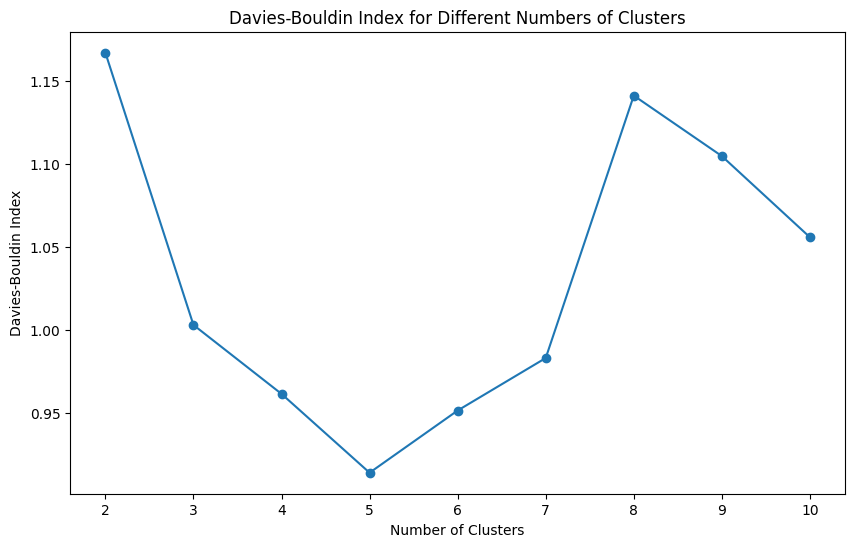

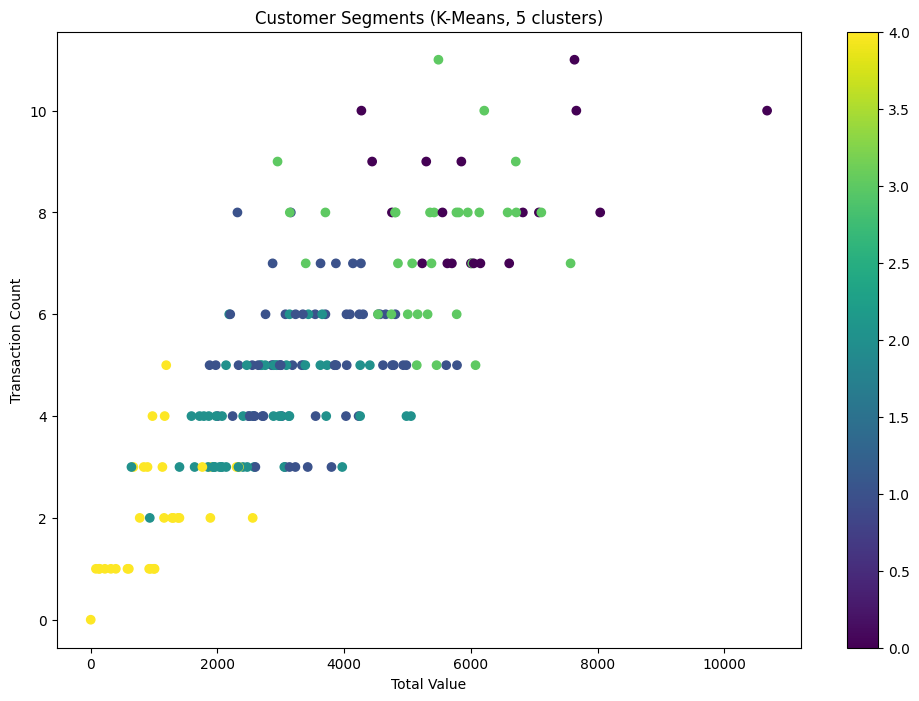

Number of clusters: 5
Davies-Bouldin Index: 0.9140504085547727

Cluster sizes:
Cluster
1    63
2    54
3    32
4    32
0    19
Name: count, dtype: int64

Cluster centroids:
   DaysSinceSignup   TotalValue  TransactionCount
0       324.631579  6285.505263          8.263158
1       263.841270  3475.011905          5.111111
2       871.277778  2708.503704          4.074074
3       884.718750  5379.749375          7.375000
4       418.093750  1038.563438          2.031250


In [8]:
# Prepare data for clustering
cluster_data = customer_data[features].copy()

# Normalize the features
scaler = StandardScaler()
normalized_cluster_data = scaler.fit_transform(cluster_data)

# Function to perform K-Means clustering and calculate DB Index
def perform_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_cluster_data)
    db_index = davies_bouldin_score(normalized_cluster_data, cluster_labels)
    return kmeans, cluster_labels, db_index

# Try different numbers of clusters
cluster_range = range(2, 11)
db_scores = []

for n_clusters in cluster_range:
    _, _, db_index = perform_kmeans(n_clusters)
    db_scores.append(db_index)

# Plot DB Index scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Choose the number of clusters with the lowest DB Index
optimal_clusters = cluster_range[db_scores.index(min(db_scores))]

# Perform final clustering with optimal number of clusters
final_kmeans, final_labels, final_db_index = perform_kmeans(optimal_clusters)

# Add cluster labels to the customer data
customer_data['Cluster'] = final_labels

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(customer_data['TotalValue'], customer_data['TransactionCount'],
                      c=customer_data['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title(f'Customer Segments (K-Means, {optimal_clusters} clusters)')
plt.xlabel('Total Value')
plt.ylabel('Transaction Count')
plt.show()

print(f"Number of clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {final_db_index}")

# Calculate other relevant metrics
print("\nCluster sizes:")
print(customer_data['Cluster'].value_counts())

print("\nCluster centroids:")
centroids = scaler.inverse_transform(final_kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print(centroid_df)